## Basic ODE Solver Example

In [25]:
#import Plots as plt
using DifferentialEquations
import Plots as plt

### Define the Solver

In [26]:
function ode(f, y0, t)
    nsteps = length(t) - 1
    y = zeros(nsteps+1)
    y[1] = y0
    
    for k ∈ 1:nsteps
        Δt = t[k+1] - t[k]
        y[k+1] = y[k] + Δt*f(y[k],t[k])
    end
    
    return y
end;

### Define the rhs function in $dy/dt = f(y,t)$

In [27]:
frhs(y,t) = -y;
rhsf(y,p,t) = -y;

### Run the solver and plot the result

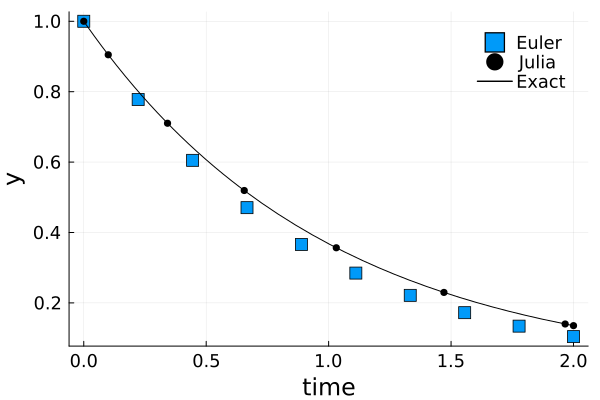

In [42]:
t  = LinRange(0,2,10)               # define the times to solve at
y0 = 1

y    = ode(   frhs, y0, t)          # solve the problem (find y(t))
soln = solve(ODEProblem((y,p,t) -> frhs(y,t), y0, (t[1],t[end]), ["dummy"]))

#-------------- plot the results

plt.resetfontsizes(); plt.scalefontsizes(1.5)
plt.scatter(t,y, label="Euler", markershape=:square, ms=6)
plt.scatter!(sol.t, sol.u, label="Julia", color="black")
plt.plot!(t->y0*exp(-t), label="Exact", color="black")
plt.plot!(xlabel="time", ylabel="y")
plt.plot!(foreground_color_legend=nothing, background_color_legend=nothing)
